<a href="https://colab.research.google.com/github/vincentjunitio00/Flower-Classification-from-scratch/blob/main/Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone "https://github.com/vincentjunitio00/Flower-Classification-from-scratch"

Cloning into 'Flower-Classification-from-scratch'...
remote: Enumerating objects: 2579, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 2579 (delta 0), reused 20 (delta 0), pack-reused 2559
Receiving objects: 100% (2579/2579), 132.98 MiB | 32.42 MiB/s, done.


In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
import os
import shutil
import random
from sklearn.preprocessing import OneHotEncoder

In [3]:
home = '/content/Flower-Classification-from-scratch/'

training_path = os.path.join(home, 'training/')
testing_path = os.path.join(home, 'testing/')

dataset = os.path.join(home,'flowers_full')
testing_random = os.path.join(home,'testing_random')
training_random = os.path.join(home,'training_random')

try:
  os.mkdir(testing_random)
  os.mkdir(training_random)
except:
  shutil.rmtree(testing_random)
  shutil.rmtree(training_random)
  os.mkdir(testing_random)
  os.mkdir(training_random)
labels = os.listdir(dataset)

In [4]:
def split_data():  
  '''
  Function to split dataset into 80% training set and 20% test set
  each dataset is chosen randomly

  Parameters:
    None
  
  Returns:
    None

  '''
  for label in labels:
    curr_dir = os.path.join(dataset,label)
    dest_training_dir = os.path.join(training_random,label)
    dest_testing_dir = os.path.join(testing_random,label)
    try:
      os.mkdir(dest_training_dir)
      os.mkdir(dest_testing_dir)
    except:
      shutil.rmtree(dest_training_dir)
      shutil.rmtree(dest_testing_dir)
      os.mkdir(dest_training_dir)
      os.mkdir(dest_testing_dir)

    files = os.listdir(curr_dir)
    rand_num_training_set = []
    while len(rand_num_training_set) < 80:
      rand_num = random.randint(0,len(files)-1)
      if(rand_num not in rand_num_training_set):
        curr_files = os.path.join(curr_dir,files[rand_num])
        rand_num_training_set.append(rand_num)
        shutil.copyfile(curr_files,dest_training_dir+'/'+files[rand_num])

    rand_num_testing_set = []
    while len(rand_num_testing_set) < 20:
      rand_num = random.randint(0,len(files)-1)
      if(rand_num not in rand_num_training_set):
        rand_num_testing_set.append(rand_num)
        curr_files = os.path.join(curr_dir,files[rand_num])

        shutil.copyfile(curr_files,dest_testing_dir+'/'+files[rand_num])
split_data()

In [7]:
len(os.listdir('/content/Flower-Classification-from-scratch/testing_random/daisy'))

20

In [8]:
def create_processed_folder(labels):
  '''
  Function to create folder which contains dataset used for training
  and testing

  Parameters:
    labels (list) : list of labels in dataset

  Returns:
    path (dict) : dictionary of processed directory path
  '''
  content = '/content/'
  processed_path = os.path.join(content, 'processed/')
  os.mkdir(processed_path)

  processed_training_path = os.path.join(processed_path, 'training/')
  os.mkdir(processed_training_path)

  processed_testing_path = os.path.join(processed_path, 'testing/')
  os.mkdir(processed_testing_path)

  path = {}
  
  for label in labels:
    training_name = str(label)+'_processed_training_path'
    training_name_path = os.path.join(processed_training_path, str(label)+'/')
    os.mkdir(training_name_path)

    testing_name = str(label)+'_processed_testing_path'
    testing_name_path = os.path.join(processed_testing_path, str(label)+'/')
    os.mkdir(testing_name_path)

    path[training_name] = training_name_path
    path[testing_name] = testing_name_path

  path["training_path"] = processed_training_path
  path["testing_path"] = processed_testing_path

  print("Warning! You can only run this function once in the same runtime!")
  return path

In [9]:
processed_path = create_processed_folder(labels)

Warning! You can only run this function once in the same runtime!


In [10]:
processed_path

{'daisy_processed_testing_path': '/content/processed/testing/daisy/',
 'daisy_processed_training_path': '/content/processed/training/daisy/',
 'dandelion_processed_testing_path': '/content/processed/testing/dandelion/',
 'dandelion_processed_training_path': '/content/processed/training/dandelion/',
 'sunflower_processed_testing_path': '/content/processed/testing/sunflower/',
 'sunflower_processed_training_path': '/content/processed/training/sunflower/',
 'testing_path': '/content/processed/testing/',
 'training_path': '/content/processed/training/'}

In [11]:
def preprocess_images(set_name, set_path, processed_path):

  '''
  Function to preprocess dataset
  1. convert images to grayscale
  2. create one hot encoding for each dataset based on its label
  
  Parameters:
    set_name (string) : define what set this preprocess for, either training or testing
    set_path (string) : define where to get the dataset
    processed_path (string) : define where to put preprocessed images
  
  Returns:
    X_set (list) : list of images (matrix 2 dimension representation)
    y_set (list) : list of label of each image (one hot encoding representation)
  '''
  X_set = []
  y_set = []

  labels = os.listdir(set_path)
  for label in labels:
    directory_now = os.path.join(set_path, str(label)+'/')
    files = os.listdir(directory_now)

    pointer = 1
    for file in files:
      file_path = os.path.join(directory_now, file)
      img = cv2.imread(file_path)
      img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      img_resized = cv2.resize(img_gray, (320, 240))
      img_final = img_resized.astype(np.float64)

      img_numpy = img_final.flatten() / 255.
      X_set.append(img_numpy)
      y_set.append([label])

      file_name = str(label)+"_processed_"+str(pointer)+'.jpg'
      file_name_path = os.path.join(processed_path[str(label)+"_processed_"+str(set_name)+"_path"],file_name)
      cv2.imwrite(file_name_path, img_final)
      pointer += 1
  
  X_set = np.array(X_set)

  ohe = OneHotEncoder()
  y_set = ohe.fit_transform(y_set).toarray()
  
  return X_set, y_set

In [12]:
X_train, y_train = preprocess_images('training', training_random, processed_path)

In [13]:
X_test, y_test = preprocess_images('testing', testing_random, processed_path)

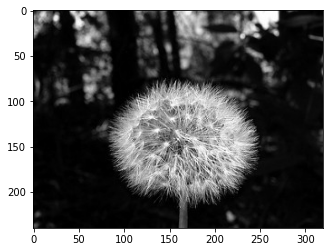

In [14]:
def visualize_images(X):
  plt.imshow(X.reshape((240, 320)), cmap='gray')

visualize_images(X_test[0])

In [15]:
np.random.seed(0)

In [16]:
def initialize_parameters(input_neuron, hidden_neuron, output_neuron):
  '''
  function to initialize parameters needed for Multi layer perceptron
  {
    W1 => weight from input to hidden,
    b1 => bias from input to hidden,
    W2 => weight from hidden to output,
    b2 => bias from hidden to output
  }
  Parameters:
    input_neuron (int) : number of input node
    hidden_neuron (int) : number of hidden node
    output_neuron (int) : number of output node
  
  Returns:
    cache (dict) : dictionary of parameters
  '''
  cache = {}
  # W1 = np.zeros((input_neuron, hidden_neuron)) + 0.5
  W1 = np.random.randn(input_neuron, hidden_neuron) * 0.001
  b1 = np.zeros((hidden_neuron, )) + 0.5
  W2 = np.random.randn(hidden_neuron, output_neuron) * 0.001
  b2 = np.zeros((output_neuron, )) + 0.5

  cache["W1"] = W1
  cache["b1"] = b1
  cache["W2"] = W2
  cache["b2"] = b2

  return cache

In [36]:
def relu(h):
  return np.maximum(0, h)

In [37]:
def reverse_relu(f1):
  # Reverse relu
  d1 = np.where(f1 > 0, 1, 0)
  return d1

In [38]:
def forward_propagation(cache, X, predict=False):
  '''
  function for feed forward by matrix multiplication and adding bias

  Parameters:
    cache (dict) : dictionary of parameters,
    X (list) : list of training data,
    predict (bool) : define whether this function called for train or predict

  Returns:
    cache (dict) : dictionary of parameters,
    g2 (list) : list of prediction
  '''

  f1 = np.dot(cache["W1"].T, X) + cache["b1"]
  g1 = relu(f1)

  f2 = np.dot(cache["W2"].T, g1) + cache["b2"]
  g2 = sigmoid(f2)

  if predict==False:
    cache["f1"] = f1
    cache["g1"] = g1
    cache["f2"] = f2
    cache["g2"] = g2
    return cache
  else:
    return g2

In [18]:
# def crossentropy(y, g):
#   entropy = 0
#   n = g.shape[0]

#   for row in range(n):
#       if y[row] == 1:
#         entropy += y[row] * (np.log2(g[row]))
#       else:
#         entropy += (1 - y[row]) * (np.log2((1-g[row])))
#   crossentropy = -1/n * entropy
#   return crossentropy

In [19]:
def squared_error(y, g):
  '''
  function to calculate loss function (square error)

  Parameters:
    y (list) : list of real label,
    g (list) : list of predict label
  
  Returns:
    sum (int) : error
  '''
  sum = np.mean((y - g)**2)
  return sum

In [20]:
# def softmax(h):
#   h /= 1000
#   soft = np.exp(h) / np.sum(np.exp(h))
#   soft[np.isnan(soft)] = 0
#   return soft

In [21]:
def one_hot_encoding(g):
  '''
  function to convert label into one hot encoding

  Parameters:
    g (list) : list of label,
  
  Returns:
    y (list) : list of one hot encoding of label
  '''
  y = np.zeros(g.size)
  y[np.argmax(g)] = 1
  return y

In [22]:
def reverse_squared_error(y, g):
  '''
  function to calculate derivative of square error

  Parameters:
    g (list) : list of label,
  
  Returns:
    reverse (list) : list of derivative of square error
  '''
  reverse = 2 ** np.sum(y - g)
  return reverse

In [23]:
def sigmoid(g):
  '''
  function to apply sigmoid into predicted

  Parameters:
    g (list) : list of predicted result
  
  Returns:
    sigmoid of g
  '''
  return 1 / (1 + np.exp(-g))

In [24]:
# def reverse_softmax(f2):
#   f2 /= 1000
#   d = []
#   for i in range(len(f2)):
#     derivative = np.exp(f2[i]) * np.sum([np.exp(f2[j]) for j in range(len(f2)) if j != i])
#     d.append(derivative)
#   d = np.array(d)
#   d[np.isinf(d)] = 1
#   d[np.isnan(d)] = 0
#   return d

In [25]:
def reverse_sigmoid(f):
  '''
  function to calculate derivative of sigmoid function
    
  Parameters:
    f (list) : list of predicted result
  
  Returns:
    list of derivative of sigmoid function
  '''
  return sigmoid(f) * (1-sigmoid(f))

In [39]:
def backward_propagation(cache, X, y):
  '''
  function to perform backpropagation

  Parameters:
    cache (list) : list of parameters,
    X (list) : list of images,
    y (list) : list of predicted labels
  
  Returns:
    cache (dict) : dictionary of parameters

  '''

  dW2 = np.zeros(cache["W2"].shape)
  db2 = np.zeros(cache["b2"].shape)

  dEOout = reverse_squared_error(y, cache["g2"])

  d = reverse_sigmoid(cache["f2"])
  dW2 += dEOout * d * cache["f2"]
  db2 += dEOout * d

  dW1 = np.zeros(cache["W1"].shape)
  db1 = np.zeros(cache["b1"].shape)

  d1 = reverse_relu(cache["f1"])
  dEHidden = np.sum(dEOout * d * cache["W2"], axis=1)
  dW1 += dEHidden * d1 * X.reshape(-1, 1)
  db1 += dEHidden * d1

  cache["dW1"] = dW1
  cache["db1"] = db1
  cache["dW2"] = dW2
  cache["db2"] = db2
  return cache

In [27]:
def update_weights(cache, learning_rate):
  '''
  function to update parameters

  Parameters:
    cache(dict) : dictionary of parameters,
    learning_rate (float) : define learning rate
  
  Returns:
    cache(dict) : dictionary of updated parameters
  '''
  cache["W1"] = cache["W1"] - learning_rate * cache["dW1"]
  cache["b1"] = cache["b1"] - learning_rate * cache["db1"]
  cache["W2"] = cache["W2"] - learning_rate * cache["dW2"]
  cache["b2"] = cache["b2"] - learning_rate * cache["db2"]
  return cache

In [28]:
def accuracy(y, y_pred):
  '''
  function to calculate how many label predicted correctly

  Parameters:
    y (list) : list of real labels,
    y_pred (list) : list of predicted labels

  Returns: 
    number of accuracy
  '''
  return (y == y_pred).all()

In [73]:
# np.seterr(divide='ignore', invalid='ignore')

def train(input_neuron, hidden_neuron, output_neuron, X_train, y_train, learning_rate=0.001, epochs=5):
  '''
  function to perform training

  Parameters:
    input_neuron (int) : define number of input node,
    hidden_neuron (int) : define number of hidden node,
    output_neuron (int) : define number of output node,
    X_train (list) : list of training set,
    y_train (list) : list of label of training set,
    learning_rate (float) : learning rate of training
    epochs (int) : epoch for the training

  Returns:
    cache(dict) : dictionary of updated parameters
  '''
  
  cache = initialize_parameters(input_neuron, hidden_neuron, output_neuron)
  acc_per_epoch = []
  cost_per_epoch = []
  for epoch in range(epochs):
    cost_total = []
    acc_total = []

    print("Running epoch", str(epoch + 1))

    for i in range(0, len(X_train)):
      cache = forward_propagation(cache, X_train[i])
      cost = squared_error(y_train[i], cache["g2"])
      cache = backward_propagation(cache, X_train[i], y_train[i])
      cache = update_weights(cache, learning_rate)

      acc = accuracy(y_train[i], one_hot_encoding(cache["g2"]))

      acc_total.append(acc)
      cost_total.append(cost)

    acc_total = np.mean(acc_total)
    cost_total = np.mean(cost_total)
    acc_per_epoch.append(acc_total)
    cost_per_epoch.append(cost_total)

  cache["acc_per_epoch"] = acc_per_epoch
  cache["cost_per_epoch"] = cost_per_epoch
  
  return cache

cache = train(X_train.shape[1], 200, 3, X_train, y_train)

Running epoch 1
Running epoch 2
Running epoch 3
Running epoch 4
Running epoch 5


In [74]:
cache

{'W1': array([[ 9.30077939e-04,  1.60278229e-03,  3.25371939e-04, ...,
          1.46545668e-03,  1.95006019e-03,  2.60715847e-04],
        [-8.49901524e-05, -2.17257226e-04,  3.00234874e-04, ...,
         -1.02263209e-03,  1.41689707e-03, -4.10278177e-05],
        [ 6.01225382e-04,  8.51100395e-04,  3.85185905e-04, ...,
         -4.24091537e-05,  1.31882464e-03,  1.10405365e-03],
        ...,
        [-1.65556665e-03,  1.55881544e-03,  2.40856935e-03, ...,
         -2.84287709e-04, -9.22541202e-04,  6.73953953e-04],
        [-9.70103329e-04,  2.77281869e-04,  7.09770044e-05, ...,
          3.64999794e-04, -1.92137324e-04, -3.18983687e-04],
        [-3.07301101e-04, -9.79129625e-04, -1.72576777e-03, ...,
         -7.33920326e-04,  4.57360655e-04, -2.59717717e-04]]),
 'W2': array([[ 1.25045654e-03,  3.61481316e-04,  2.27977543e-03],
        [-1.58774253e-03,  1.79327633e-04, -2.36083778e-04],
        [-1.86994118e-03,  6.38739793e-04,  1.45014597e-03],
        [ 2.97253007e-05, -9.65949

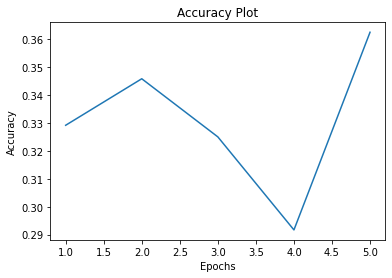

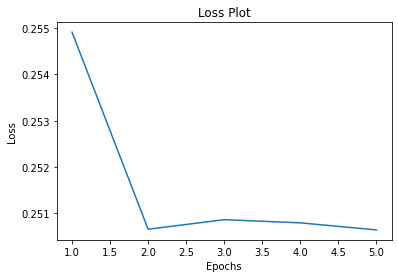

In [75]:
import matplotlib.pyplot as plt
plt.title('Accuracy Plot')
plt.plot(np.arange(len(cache["acc_per_epoch"]))+1, cache["acc_per_epoch"])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

plt.title('Loss Plot')
plt.plot(np.arange(len(cache["cost_per_epoch"]))+1, cache["cost_per_epoch"])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [76]:
def predict(cache, X_test):
  '''
  function to calculate prediction for testing

  Parameters:
    cache (dict) : dictionary of parameters,
    X_test (list) : list of test set

  Returns:
    list of prediction
  '''
  prediction = []
  for X in X_test:
    y = forward_propagation(cache, X, predict=True)
    y_pred = one_hot_encoding(y)
    prediction.append(y_pred)
  return np.array(prediction)

In [77]:
prediction = predict(cache, X_test)

In [78]:
count = []
for y in range(len(prediction)):
  count.append((prediction[y] == y_test[y]).all())
  # count.append(accuracy(prediction[y], y_test[y]))

np.mean(count)

0.36666666666666664

In [79]:
prediction

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0

In [80]:
cache = train(X_train.shape[1], 200, 3, X_train, y_train, learning_rate=0.1, epochs=50)

Running epoch 1
Running epoch 2
Running epoch 3
Running epoch 4
Running epoch 5
Running epoch 6
Running epoch 7
Running epoch 8
Running epoch 9
Running epoch 10
Running epoch 11
Running epoch 12
Running epoch 13
Running epoch 14
Running epoch 15
Running epoch 16
Running epoch 17
Running epoch 18
Running epoch 19
Running epoch 20
Running epoch 21
Running epoch 22
Running epoch 23
Running epoch 24
Running epoch 25
Running epoch 26
Running epoch 27
Running epoch 28
Running epoch 29
Running epoch 30
Running epoch 31
Running epoch 32
Running epoch 33
Running epoch 34
Running epoch 35
Running epoch 36
Running epoch 37
Running epoch 38
Running epoch 39
Running epoch 40
Running epoch 41
Running epoch 42
Running epoch 43
Running epoch 44
Running epoch 45
Running epoch 46
Running epoch 47
Running epoch 48
Running epoch 49
Running epoch 50


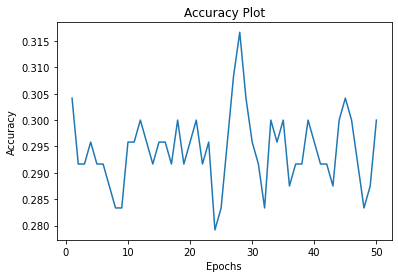

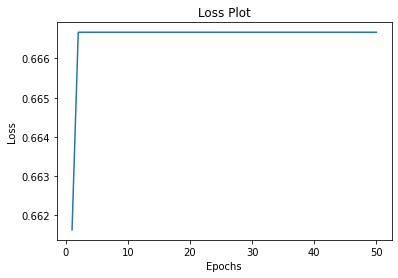

In [81]:
import matplotlib.pyplot as plt
plt.title('Accuracy Plot')
plt.plot(np.arange(len(cache["acc_per_epoch"]))+1, cache["acc_per_epoch"])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

plt.title('Loss Plot')
plt.plot(np.arange(len(cache["cost_per_epoch"]))+1, cache["cost_per_epoch"])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [82]:
prediction = predict(cache, X_test)

count = []
for y in range(len(prediction)):
  count.append((prediction[y] == y_test[y]).all())
  # count.append(accuracy(prediction[y], y_test[y]))

np.mean(count)

0.26666666666666666

In [83]:
prediction

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [84]:
cache = train(X_train.shape[1], 200, 3, X_train, y_train, learning_rate=0.8, epochs=50)

Running epoch 1
Running epoch 2
Running epoch 3
Running epoch 4
Running epoch 5
Running epoch 6
Running epoch 7
Running epoch 8
Running epoch 9
Running epoch 10
Running epoch 11
Running epoch 12
Running epoch 13
Running epoch 14
Running epoch 15
Running epoch 16
Running epoch 17
Running epoch 18
Running epoch 19
Running epoch 20
Running epoch 21
Running epoch 22
Running epoch 23
Running epoch 24
Running epoch 25
Running epoch 26
Running epoch 27
Running epoch 28
Running epoch 29
Running epoch 30
Running epoch 31
Running epoch 32
Running epoch 33
Running epoch 34
Running epoch 35
Running epoch 36
Running epoch 37
Running epoch 38
Running epoch 39
Running epoch 40
Running epoch 41
Running epoch 42
Running epoch 43
Running epoch 44
Running epoch 45
Running epoch 46
Running epoch 47
Running epoch 48
Running epoch 49
Running epoch 50


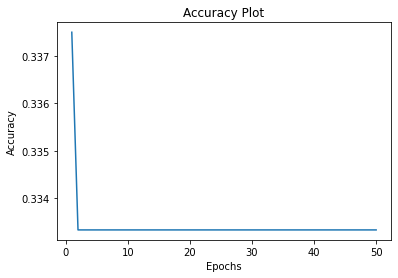

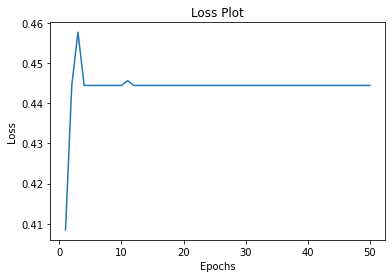

In [85]:
import matplotlib.pyplot as plt
plt.title('Accuracy Plot')
plt.plot(np.arange(len(cache["acc_per_epoch"]))+1, cache["acc_per_epoch"])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

plt.title('Loss Plot')
plt.plot(np.arange(len(cache["cost_per_epoch"]))+1, cache["cost_per_epoch"])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [87]:
prediction = predict(cache, X_test)

count = []
for y in range(len(prediction)):
  count.append((prediction[y] == y_test[y]).all())
  # count.append(accuracy(prediction[y], y_test[y]))

np.mean(count)

0.3333333333333333